# Methane hotspot - April 27 2021 start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sector_plot import sector_plot
import os
pd.options.display.max_columns = None

### Listing available landsat dates:

In [161]:
rootPath = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_code/python_code'
os.chdir(rootPath)
this_path = os.getcwd()
os.chdir('/Volumes/GoogleDrive/My Drive/Micromet_GEE')
data = pd.read_csv('Young_spatial_indices_2022_May_Mar.csv',delimiter = ',',header = 1)
# data = pd.read_csv('Young_spatial_indices_2021_May_2022_Nov_scaled.csv',delimiter = ',',header = 1)
# data = pd.read_csv('US-WPT_spatial_indices_2012_Jan_2013_Dec.csv',delimiter = ',',header = 1)

# data = pd.read_csv('Young_spatial_indices_2021_May_Aug_small.csv',delimiter = ',',header = 1)
# data = pd.read_csv('US-Myb_spatial_indices_2020_Jan_2022_June.csv',delimiter = ',',header = 1)
# data = pd.read_csv('US-Myb_spatial_indices_2014.csv',delimiter = ',',header = 1)
os.chdir(this_path)
UniqueID_unsorted = np.unique(data['id'])
UniqueID = np.array([1]*(len(UniqueID_unsorted)))
for i in range(len(UniqueID_unsorted)):
    number = int(UniqueID_unsorted[i][12:])
    UniqueID[i] = (number)
UniqueID.sort()
UniqueID
print(f'\nAvailable landsat scenes: \n{UniqueID}')

# Load original EC data
os.chdir('/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_code/data')
os.chdir('/Volumes/GoogleDrive/My Drive/Micromet Lab/Projects/2021-Young/Flux-tower/Flux_data')
# raw = pd.read_csv('Young_L3.csv',header=0)
os.chdir('/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/Site_Data')
raw = pd.read_csv('US-WPT.csv',header=0)
# raw = pd.read_csv('US-Myb.csv',header=0)
os.chdir(rootPath)


Available landsat scenes: 
[20210511 20210527 20210612 20210628 20210808 20210831 20210925 20211002
 20211011 20211018 20211103]


#### March 1 - May 31 2019

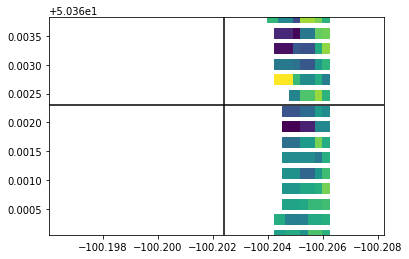

In [175]:
# Check L8 map
Value = 'NDVI'
L8_IMAGE = 20210628
UniqueID
N = len(data['id'])
Ndate = len(UniqueID)
imageCollection = {'latitude':[],'longitude':[],'NDVI':[],'NDWI':[],'MNDWI_SW1':[],'MNDWI_SW2':[],'CELSIUS':[]}

for i in range(N):
    id_date = data['id'][i][12:]
    if id_date == str(L8_IMAGE):
        for key in imageCollection.keys():
            imageCollection[key].append(data[key][i])
plt.scatter(imageCollection['longitude'],imageCollection['latitude'],c=imageCollection[Value],marker='s',s=100)
xzoom = -0.01
yzoom = -0.00000
plt.xlim([min(imageCollection['longitude'])-xzoom,max(imageCollection['longitude'])+xzoom])
plt.ylim([min(imageCollection['latitude'])-yzoom,max(imageCollection['latitude'])+yzoom])
plt.axvline(tower_coordinates[0],c='k')
plt.axhline(tower_coordinates[1],c='k')



Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'DATE', 'CO2', 'H2O', 'FC',
       'NEE_PI', 'CH4', 'FCH4', 'H', 'LE', 'WD', 'WS', 'USTAR', 'ZL',
       'MO_LENGTH', 'W_SIGMA', 'V_SIGMA', 'U_SIGMA', 'T_SONIC',
       'T_SONIC_SIGMA', 'PA', 'RH', 'TA_1_1_1', 'TA_1_2_1', 'TW_PI_1',
       'TW_PI_2', 'TS_PI_1', 'TS_PI_2', 'WTD', 'NETRAD', 'PPFD_IN', 'SW_IN',
       'SW_OUT', 'LW_IN', 'LW_OUT', 'P'],
      dtype='object')


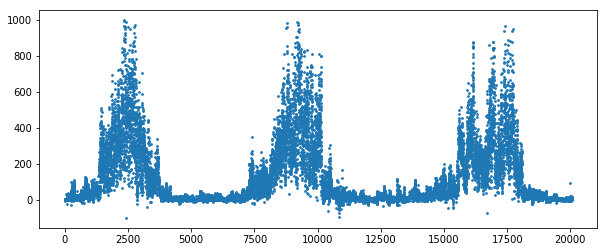

In [191]:
# Check EC Data:
plt.figure(figsize=(10,4))
print(raw.keys())
missing = -9999
x_data = raw['FCH4']
x_data = x_data[x_data>missing]
plt.scatter(np.arange(len(x_data)),x_data,s=3)


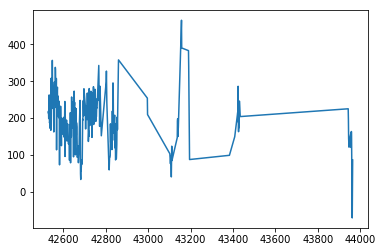

In [69]:
# Check methane behaviour during desired period
# time_start = "2013-08-15 00:00:00"
# time_end = "2013-09-05 23:30:00"-
time_start = 201306050000
time_end = 201307050000
window_start = np.where(raw['DATE']==time_start)[0][0]
window_end = np.where(raw['DATE']==time_end)[0][0]
windowedData = raw['FCH4'][window_start:window_end]
# Remove 'nans'
plotData = windowedData[windowedData>-1000]
plt.plot(plotData)

returns dict_keys(['lonData', 'latData', 'spatialData'])
returns dict_keys(['lonData', 'latData', 'spatialData'])
returns dict_keys(['lonData', 'latData', 'spatialData'])
returns dict_keys(['lonData', 'latData', 'spatialData'])
returns dict_keys(['lonData', 'latData', 'spatialData'])
Matching ffp resolution to landsat resolution progress: 0/443
Matching ffp resolution to landsat resolution progress: 50/443
Matching ffp resolution to landsat resolution progress: 100/443
Matching ffp resolution to landsat resolution progress: 150/443
Matching ffp resolution to landsat resolution progress: 200/443
Matching ffp resolution to landsat resolution progress: 250/443
Matching ffp resolution to landsat resolution progress: 300/443
Matching ffp resolution to landsat resolution progress: 350/443
Matching ffp resolution to landsat resolution progress: 400/443


/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/sector_plot.py:259: RuntimeWarning: Mean of empty slice
  if np.nanmean(sector_landsat[index][sect]) < 1000: # Skipping nan values (for stat purposes)


ValueError: x and y must be the same size

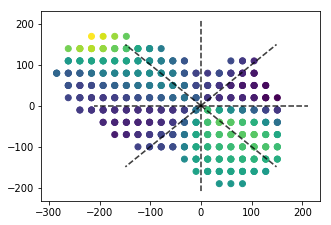

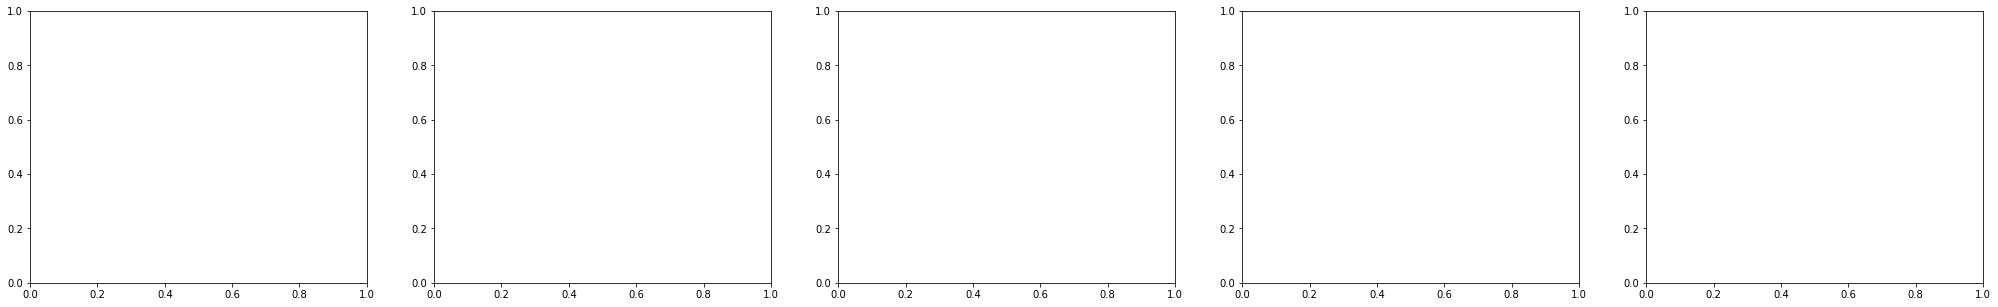

In [163]:
os.chdir(rootPath)
# tower_coordinates = [-100.534,50.371] # Hogg
tower_coordinates = [-100.20242,50.3623] # Young updated coordinates
# tower_coordinates = [-122.9849,49.1293] # BB1
# tower_coordinates = [-122.99511,49.11897] # BB2
# tower_coordinates = [-121.7651,38.0498] # Mayberry
# tower_coordinates = [-82.9962,41.4646] # WPT

L8_date = 20210628
# L8_filename = 'US-WPT_spatial_indices_2012_Jan_2013_Dec.csv'
L8_filename = 'Young_spatial_indices_2021_May_Nov.csv'
# L8_filename = 'Young_spatial_indices_2021_May_Aug_small.csv'
# L8_filename = 'bb1_spatial_indices_big.csv'
# L8_filename = 'bb1_spatial_indices_2014May_2021Sept.csv'
# L8_filename = 'US-Myb_spatial_indices_2020_Jan_2022_June.csv'
# L8_filename = 'US-Myb_spatial_indices_2014.csv'

# FARF_filename = '202107023-202108006.csv' # files found in "data" subfolder
FARF_filename = '202106015-202107015.csv'

[fig1,fig2,fig3,fig4,fig5,data] = sector_plot(L8_date,L8_filename,FARF_filename,tower_coordinates);
plt.close(),plt.close(),plt.close(),plt.close(),plt.close()

display(fig1, fig2, fig3, fig4,fig5)

## Dataframe:

In [132]:
print('Data:')
for idx, key in enumerate(data.keys()):
    print(f'     {idx+1}: {key}')
landsat = data['landsat']
matched_ffp = data['matched_ffp']
ffp = data['ffp']
sector_landsat_average = data['sector_landsat_average']
sector_ffp_average = data['sector_fpp_average']
full_lonData = data['lonData']
full_latData = data['latData']
lonData = landsat['lonData']
latData = landsat['latData']
spatialData = data['spatialData']

# Renaming MNDWI to NDMI
spatialData['NDMI'] = spatialData.pop('MNDWI')
landsat['NDMI'] = landsat.pop('MNDWI')

# Printing all available data and column names
print('\nspatialData OR landsat:')
for idx, key in enumerate(spatialData.keys()):
    print(f'     {idx+1}: {key}')
print('\nffp:')
for idx, key in enumerate(ffp.keys()):
    print(f'     {idx+1}: {key}')
print('\nlandsat:')
for idx, key in enumerate(landsat.keys()):
    print(f'     {idx+1}: {key}')

GHG_var = 'ch4'

Data:
     1: landsat
     2: matched_ffp
     3: ffp
     4: sector_landsat_average
     5: sector_fpp_average
     6: lonData
     7: latData
     8: spatialData

spatialData OR landsat:
     1: MNDWI2
     2: NDVI
     3: NDWI
     4: temp
     5: NDMI

ffp:
     1: xr
     2: yr
     3: co2
     4: ch4
     5: h

landsat:
     1: MNDWI2
     2: NDVI
     3: NDWI
     4: temp
     5: lonData
     6: latData
     7: NDMI


## Clustering

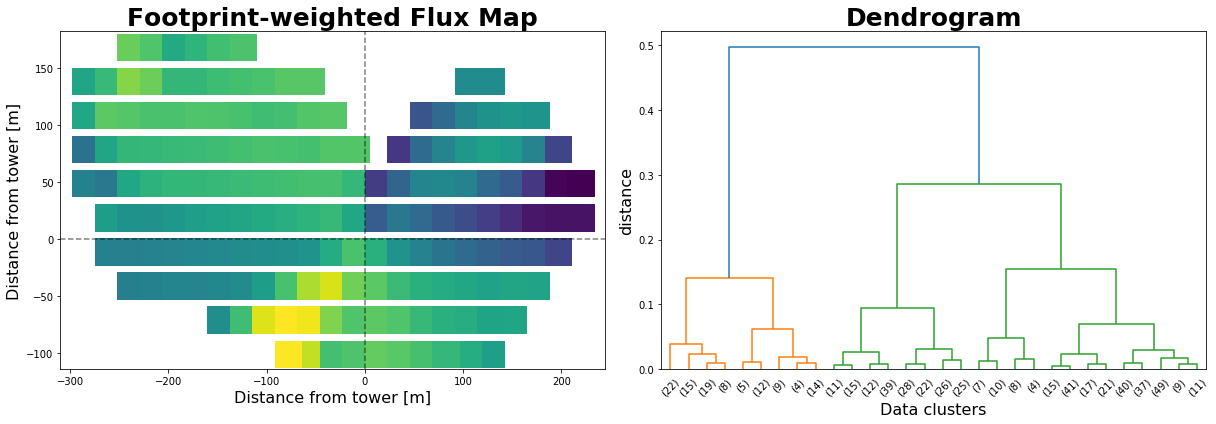

In [138]:
# DENDROGRAM
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# dend_data = np.transpose([np.unique(matched_ffp[GHG_var]),np.unique(matched_ffp[GHG_var])])
dend_data = np.transpose([matched_ffp[GHG_var],matched_ffp[GHG_var]])

linked = linkage(dend_data,'ward')
# labelList = range(1, 194)

fig, ax = plt.subplots(1,2,figsize=(17, 6))
ax[0].scatter(matched_ffp['xr'],matched_ffp['yr'],c=matched_ffp[GHG_var],marker = 's',s=700)
ax[0].axvline(0,c='k',linestyle='--',alpha=0.5)
ax[0].axhline(0,c='k',linestyle='--',alpha=0.5)
ax[0].set_title('Footprint-weighted Flux Map',fontsize=25,fontweight='bold')
ax[0].set_xlabel('Distance from tower [m]',fontsize=16)
ax[0].set_ylabel('Distance from tower [m]',fontsize=16)
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=30)
# plt.axhline(0.2,c='k',linestyle='--',alpha=0.5)
plt.title('Dendrogram',fontsize=25,fontweight='bold')
plt.ylabel('distance',fontsize=16)
plt.xlabel('Data clusters',fontsize=16)
plt.tight_layout()

# ax[0].text(-160,137,'a)',fontsize = 22)
# plt.text(5,805,'b)',fontsize = 22)
# plt.savefig('Thesis_dendrogram.png')

plt.show()

/Users/darianng/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


current Gas analysis: ch4


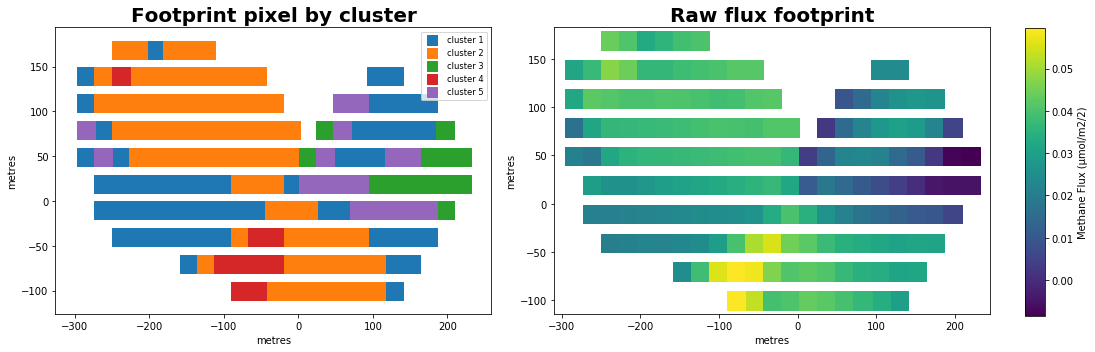

In [139]:
#now cluster
n_clusters = 5
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
# cluster = AgglomerativeClustering(n_clusters=n_clusters, 
#                                   affinity='euclidean', 
#                                   linkage='average')

cn_PC = cluster.fit_predict(dend_data)
#find mean pattern of each cluster
cluster_pattern_PC = np.empty((n_clusters,np.shape(dend_data)[1]))

# For 2 clusters
for cluster_num in range(n_clusters):
    inds_PC = np.argwhere(cn_PC==cluster_num)
    cluster_pattern_PC[cluster_num,:] = np.mean(dend_data[inds_PC,:],axis=0)
    
    
fig2, ax2 = plt.subplots(1,2,figsize=(14,5))
for i in range(len(np.unique(cn_PC))):
    clus_num = np.where(cn_PC==i)[0]
    ax2[0].scatter(np.array(matched_ffp['xr'])[clus_num],np.array(matched_ffp['yr'])[clus_num],label=f'cluster {i+1}',marker = 's',s=350)
    
raw = ax2[1].scatter(matched_ffp['xr'],matched_ffp['yr'],c=matched_ffp[GHG_var],marker = 's',s=350)
    
ax2[0].set_ylabel('metres'),ax2[1].set_ylabel('metres')
ax2[0].set_xlabel('metres'),ax2[1].set_xlabel('metres')
ax2[0].set_title('Footprint pixel by cluster',fontsize = 20, fontweight='bold'),ax2[1].set_title('Raw flux footprint',fontsize = 20,fontweight='bold')

ax2[0].legend(loc='upper right',fontsize='small',markerscale=0.5)

# ax2[0].set_ylim([-210,170]),ax2[1].set_ylim([-210,170])
# ax2[0].set_xlim([-250,200]),ax2[1].set_xlim([-250,200])

# Right side cbar position
cbar_ax = fig2.add_axes([1.02, 0.11, 0.02, 0.8])
cbar1 = fig2.colorbar(raw, ax=ax2[1],cax=cbar_ax,label = 'Methane Flux (µmol/m2/2)')

plt.tight_layout()
# plt.savefig('cluster.png',transparent=True,bbox_inches = "tight")
print(f'current Gas analysis: {GHG_var}')

In [140]:
# Compiling data
clustered_ffp = {}
clustered_landsat = {}
for clus_idx in range(n_clusters):
    clus_num = np.where(cn_PC == clus_idx)[0]
    clustered_ffp[f'xr_{clus_idx+1}'] = np.array(matched_ffp['xr'])[clus_num]
    clustered_ffp[f'yr_{clus_idx+1}'] = np.array(matched_ffp['yr'])[clus_num]
    clustered_ffp[f'ch4_{clus_idx+1}'] = np.array(matched_ffp[GHG_var])[clus_num]
    clustered_landsat[f'NDVI_{clus_idx+1}'] = np.array(landsat['NDVI'])[clus_num]
    clustered_landsat[f'NDWI_{clus_idx+1}'] = np.array(landsat['NDWI'])[clus_num]
    clustered_landsat[f'NDMI_{clus_idx+1}'] = np.array(landsat['NDMI'])[clus_num]
    clustered_landsat[f'MNDWI2_{clus_idx+1}'] = np.array(landsat['MNDWI2'])[clus_num]
    clustered_landsat[f'temp_{clus_idx+1}'] = np.array(landsat['temp'])[clus_num]
mean_clustered_ffp = []
mean_clustered_landsat = {'NDVI':[],'NDWI':[],'NDMI':[],'MNDWI2':[],'temp':[]}
for i in range(n_clusters):
    mean_clustered_ffp.append(np.mean(clustered_ffp[f'ch4_{i+1}']))
    for idx,key in enumerate(spatialData):
        mean_clustered_landsat[key].append(np.mean(clustered_landsat[f'{key}_{i+1}']))

Text(0.5,1.1,'Date: 2021-06-12')

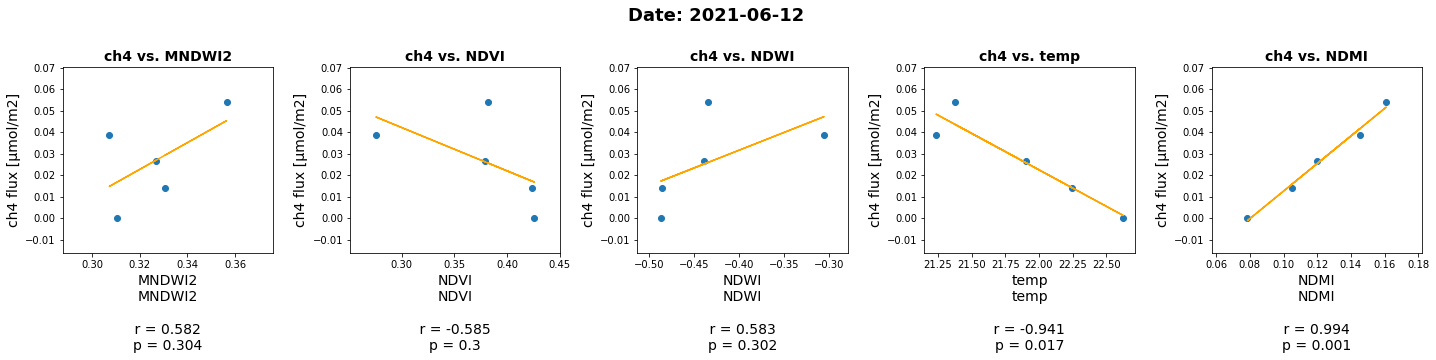

In [141]:
from scipy import stats
plt.figure(figsize = (20,4.5))
for idx,key in enumerate(spatialData):
    plt.subplot(1,5,idx+1)
    plt.scatter(mean_clustered_landsat[key],mean_clustered_ffp)
    plt.title(f'{GHG_var[:3]} vs. {key}',fontweight='bold',fontsize=14)
    m, b = np.polyfit(mean_clustered_landsat[key],mean_clustered_ffp,1)
    yfit = m*np.array(mean_clustered_landsat[key])+b
    plt.plot(mean_clustered_landsat[key],yfit,'orange')
    r_val, p_val = stats.pearsonr(mean_clustered_landsat[key],mean_clustered_ffp)
    corr = f'{key}\n \n r = {np.round(r_val,3)} \np = {np.round(p_val,3)}'
    
    plt.ylabel(f'{GHG_var[:3]} flux [µmol/m2]',fontsize=14)
    plt.xlabel(f'{key}\n{corr}',fontsize=14)

plt.tight_layout()
plt.suptitle(f'Date: {str(L8_date)[:4]}-{str(L8_date)[4:6]}-{str(L8_date)[6:8]}',y=1.1,fontsize=18,fontweight = 'bold')

# plt.suptitle(f'Date: 2021-06-30',y=1.1,fontsize=18,fontweight = 'bold')

In [65]:
# Code break
keyboard

NameError: name 'keyboard' is not defined

# ------------------------------
# Thesis Plots


In [146]:
from thesis_plots import plot_thesis_dendrogram
# thesis_fig = plot_thesis_dendrogram(fmap_x=matched_ffp['xr'],fmap_y=matched_ffp['yr'],fmap_flux=matched_ffp[GHG_var]);
# os.chdir('/Users/darianng/Documents/MSc_Geography/MSc thesis/Figures/')
# fig.savefig('Dendrogram Analysis.png')

# ---------------------------------------------------------------------------
# Compiling regression data across measurements

In [147]:
import pickle
dataPath = '/Users/darianng/Documents/MSc_Geography/MSc Thesis/Data/Compilation'

indices = ['NDWI','NDMI','NDVI','temp']
# Storing all runs into single dict, while keeping runs separate
collected_regression = {'period':[],'r_val':[],'p_val':[],'landsat':[],'ffp':[],'yfit':[]}

# Collapsing all runs into single lists
collapsed_landsat = {'NDWI':[],'NDMI':[],'NDVI':[],'temp':[]}
collapsed_ffp = []

# List of desired measurements.
# FARF_list = ['202207001-202207031_L8=20220717','202207015-202208015_L8=20220802','202208001-202208031_L8=20220818']
FARF_list = ['Young_FFP=202105027-202106029_L8=20210527',
             'Young_FFP=202106007-202106021_L8=20210612',
             'Young_FFP=202107020-202108020_L8=20210808']
for this_FARF in FARF_list:
    os.chdir(dataPath)
    with open(f'{this_FARF}.p', 'rb') as fp:
        data = pickle.load(fp)
    collected_regression['period'].append(this_FARF)
#     collected_regression['r_val'].append(r_val)
#     collected_regression['p_val'].append(p_val)
#     collected_regression['yfit'].append(yfit)
    collected_regression['landsat'].append(data['mean_clustered_landsat'])
    collected_regression['ffp'].append(data['mean_clustered_ffp'])
    collapsed_ffp.extend(data['mean_clustered_ffp'])
    for key in collapsed_landsat.keys():
        collapsed_landsat[key].extend(data['mean_clustered_landsat'][key])
os.chdir(dataPath)

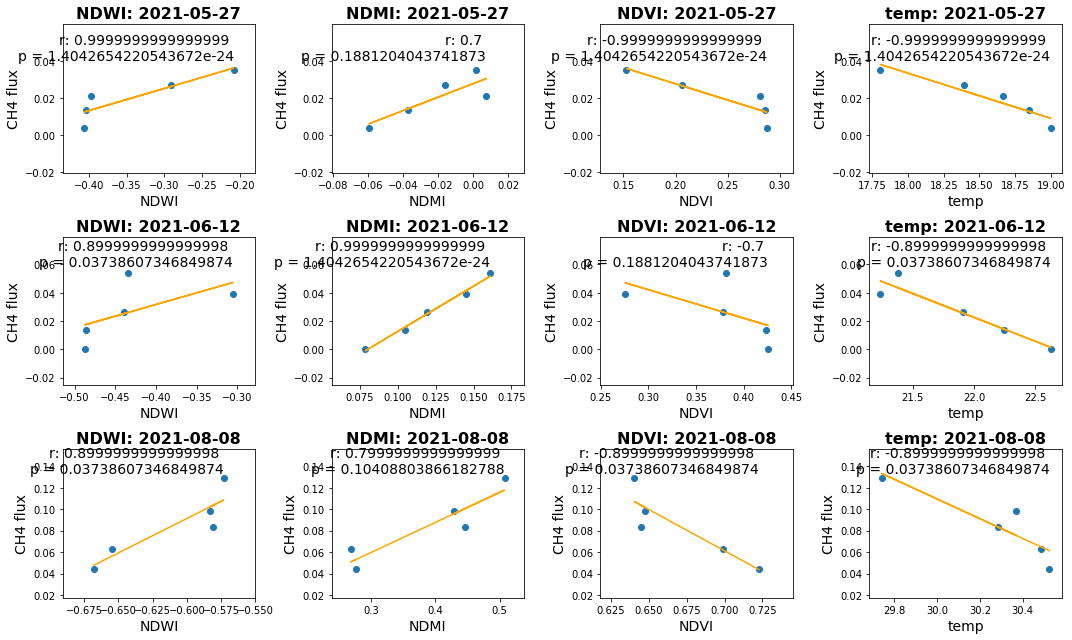

In [196]:
# Multi-observation subplot - SPEARMAN OR PEARSON. Comment at ln17
from scipy import stats
indices = ['NDWI','NDMI','NDVI','temp']
plt.figure(figsize=(15,3*len(FARF_list)))
counter = 1
for ii in range(len(collected_regression['period'])):
    for kk,idx in enumerate(indices):
        plt.subplot(len(FARF_list),4,counter)
        plt.scatter(collected_regression['landsat'][ii][idx],collected_regression['ffp'][ii])
        m, b = np.polyfit(collected_regression['landsat'][ii][idx],collected_regression['ffp'][ii],1)
        yfit = m*np.array(collected_regression['landsat'][ii][idx])+b
        plt.plot(collected_regression['landsat'][ii][idx],yfit,'orange')
        plt.ylabel('CH4 flux',fontsize = 14)
        plt.xlabel(idx,fontsize = 14)
        plt.title(f"{idx}: {collected_regression['period'][ii][-8:-4]}-{collected_regression['period'][ii][-4:-2]}-{collected_regression['period'][ii][-2:]}",fontweight = 'bold',fontsize = 16)
        
#         r_val, p_val = stats.pearsonr(collected_regression['landsat'][ii][idx],collected_regression['ffp'][ii])
        r_val, p_val = stats.spearmanr(collected_regression['landsat'][ii][idx],collected_regression['ffp'][ii])
        corr = f'r: {r_val} \np = {p_val}'
    
        plt.text(max(collected_regression['landsat'][ii][idx]),max(collected_regression['ffp'][ii])+0.005,corr,ha='right',fontsize = 14)
        counter += 1

plt.tight_layout()

# plt.savefig('Correlation.png')
# os.chdir(rootPath)
        

In [198]:
# def statistic(x):  # permute only `x`
#     return stats.spearmanr(x, y).statistic
# res_exact = stats.permutation_test((collected_regression['landsat'][ii][idx],), statistic, permutation_type='pairings')
# res_asymptotic = stats.spearmanr(collected_regression['landsat'][ii][idx], collected_regression['ffp'][ii])
# res_exact.pvalue, res_asymptotic.pvalue

x = [1.76405235, 0.40015721, 0.97873798,2.2408932, 1.86755799, -0.97727788]
y = [2.71414076, 0.2488, 0.87551913,2.6514917, 2.01160156, 0.47699563]
def statistic(x):  # permute only `x`
    return stats.spearmanr(x, y).statistic
res_exact = stats.permutation_test((x,), statistic, permutation_type='pairings')
res_asymptotic = stats.spearmanr(x, y)
res_exact.pvalue, res_asymptotic.pvalue

AttributeError: module 'scipy.stats' has no attribute 'permutation_test'

In [ ]:
# Multi-observation subplot - SPEARMAN OR PEARSON. Comment at ln17
from scipy import stats
indices = ['NDWI','NDMI','NDVI','temp']
plt.figure(figsize=(15,3*len(FARF_list)))
counter = 1
for ii in range(len(collected_regression['period'])):
    for kk,idx in enumerate(indices):
        plt.subplot(len(FARF_list),4,counter)
        plt.scatter(collected_regression['landsat'][ii][idx],collected_regression['ffp'][ii])
        m, b = np.polyfit(collected_regression['landsat'][ii][idx],collected_regression['ffp'][ii],1)
        yfit = m*np.array(collected_regression['landsat'][ii][idx])+b
        plt.plot(collected_regression['landsat'][ii][idx],yfit,'orange')
        plt.ylabel('CH4 flux',fontsize = 14)
        plt.xlabel(idx,fontsize = 14)
        plt.title(f"{idx}: {collected_regression['period'][ii][-8:-4]}-{collected_regression['period'][ii][-4:-2]}-{collected_regression['period'][ii][-2:]}",fontweight = 'bold',fontsize = 16)
        
        r_val, p_val = stats.spearmanr(collected_regression['landsat'][ii][idx],collected_regression['ffp'][ii])
        corr = f'r: {r_val} \np = {p_val}'
    
        plt.text(max(collected_regression['landsat'][ii][idx]),max(collected_regression['ffp'][ii])+0.005,corr,ha='right',fontsize = 14)
        counter += 1

plt.tight_layout()

# plt.savefig('Correlation.png')
# os.chdir(rootPath)
        

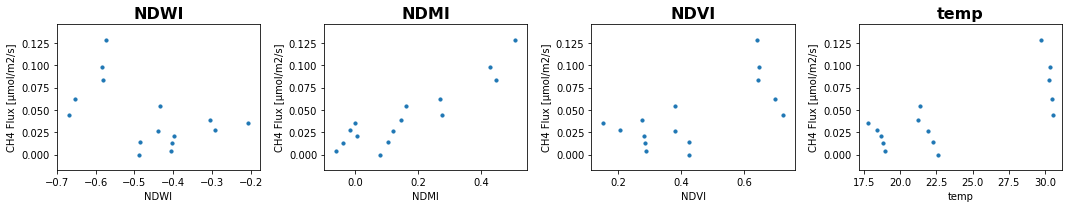

In [152]:
# Compiled Regression

plt.figure(figsize=(15,3))
for idx,key in enumerate(collapsed_landsat.keys()):
    plt.subplot(1,4,idx+1)
    plt.scatter(collapsed_landsat[key],collapsed_ffp,s=10)
    plt.title(key,fontsize=16,fontweight='bold')
    plt.ylabel('CH4 Flux [µmol/m2/s]')
    plt.xlabel(key)
plt.tight_layout()

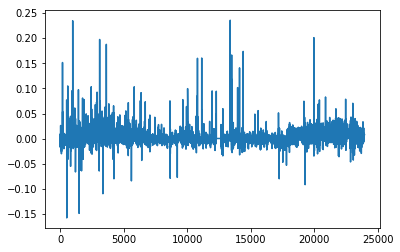

In [63]:
raw = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1txCh9lZ7VGCujXGvBaJCMVnuxT-65q4K/Micromet Lab/Projects/2021-Hogg/Flux-tower/Flux_data/Hogg_L3.csv',header=0)
plt.plot(raw['FCH4_gf_RF'])

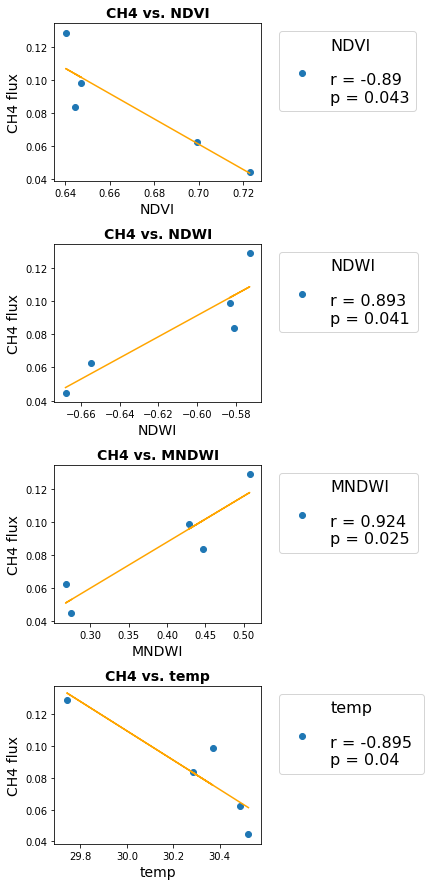

In [118]:
from scipy import stats
plt.figure(figsize = (6,15))
key_ls = ['NDVI','NDWI','MNDWI','temp']
for idx,key in enumerate(key_ls):
    plt.subplot(5,1,idx+1)
    plt.title(f'CH4 vs. {key}',fontweight='bold',fontsize=14)
    m, b = np.polyfit(mean_clustered_landsat[key],mean_clustered_ffp,1)
    yfit = m*np.array(mean_clustered_landsat[key])+b
    plt.plot(mean_clustered_landsat[key],yfit,'orange')
    r_val, p_val = stats.pearsonr(mean_clustered_landsat[key],mean_clustered_ffp)
    corr = f'{key}\n \nr = {np.round(r_val,3)} \np = {np.round(p_val,3)}'
    plt.scatter(mean_clustered_landsat[key],mean_clustered_ffp,label=corr)
    
    plt.ylabel('CH4 flux',fontsize=14)
    plt.xlabel(f'{key}',fontsize=14)
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1),fontsize = 16)


rootPath = os.getcwd()
os.chdir('/Users/darianng/Documents/MSc_Geography/Spring_Review/Images')
# plt.savefig('corr.png')

os.chdir(rootPath)

In [99]:
rootPath = os.getcwd()
os.chdir(rootPath)

In [6]:
keyboard

NameError: name 'keyboard' is not defined

# ------------------------------------------
# STORING GOOD OUTPUT DATA INTO FOLDER: "Saved_Data"

##### Preview:

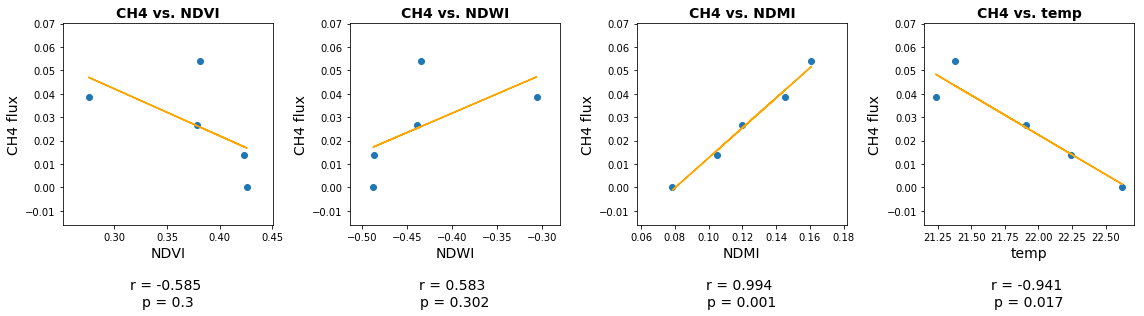

In [142]:
# Figure 1: clustered regression
saved_indices = ['NDVI','NDWI','NDMI','temp']
fig1 = plt.figure(figsize = (len(saved_indices)*4,4.5))
for idx,key in enumerate(saved_indices):
    plt.subplot(1,len(saved_indices),idx+1)
    plt.scatter(mean_clustered_landsat[key],mean_clustered_ffp)
    plt.title(f'CH4 vs. {key}',fontweight='bold',fontsize=14)
    m, b = np.polyfit(mean_clustered_landsat[key],mean_clustered_ffp,1)
    yfit = m*np.array(mean_clustered_landsat[key])+b
    plt.plot(mean_clustered_landsat[key],yfit,'orange')
    r_val, p_val = stats.pearsonr(mean_clustered_landsat[key],mean_clustered_ffp)
    corr = f'r = {np.round(r_val,3)} \np = {np.round(p_val,3)}'
    
    plt.ylabel('CH4 flux',fontsize=14)
    plt.xlabel(f'{key}\n\n{corr}',fontsize=14)
fig1.tight_layout()

/Users/darianng/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


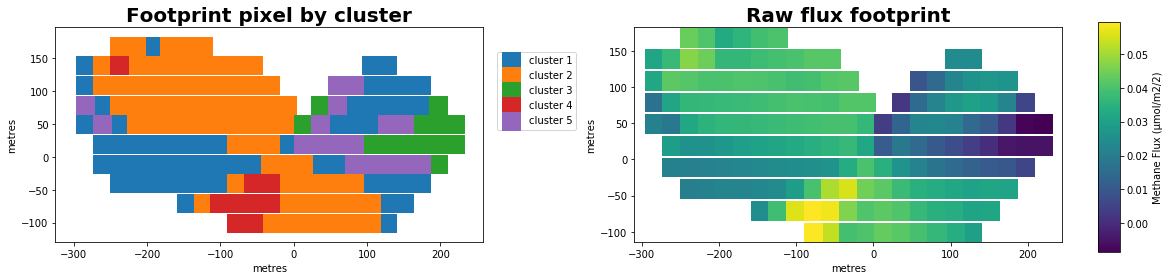

In [143]:
# Figure 2: Cluster plot
n_clusters = 5
point_size = 350
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
# cluster = AgglomerativeClustering(n_clusters=n_clusters, 
#                                   affinity='euclidean', 
#                                   linkage='average')

cn_PC = cluster.fit_predict(dend_data)
#find mean pattern of each cluster
cluster_pattern_PC = np.empty((n_clusters,np.shape(dend_data)[1]))

# For 2 clusters
for cluster_num in range(n_clusters):
    inds_PC = np.argwhere(cn_PC==cluster_num)
    cluster_pattern_PC[cluster_num,:] = np.mean(dend_data[inds_PC,:],axis=0)
    
    
fig2, ax2 = plt.subplots(1,2,figsize=(15,4))
for i in range(len(np.unique(cn_PC))):
    clus_num = np.where(cn_PC==i)[0]
    ax2[0].scatter(np.array(matched_ffp['xr'])[clus_num],np.array(matched_ffp['yr'])[clus_num],label=f'cluster {i+1}',marker = 's',s=point_size)
    
raw = ax2[1].scatter(matched_ffp['xr'],matched_ffp['yr'],c=matched_ffp['ch4'],marker = 's',s=point_size)
    
ax2[0].set_ylabel('metres'),ax2[1].set_ylabel('metres')
ax2[0].set_xlabel('metres'),ax2[1].set_xlabel('metres')
ax2[0].set_title('Footprint pixel by cluster',fontsize = 20, fontweight='bold'),ax2[1].set_title('Raw flux footprint',fontsize = 20,fontweight='bold')

ax2[0].legend(bbox_to_anchor=(1.02, 0.11, 0.02, 0.8))

# ax2[0].set_ylim([-210,170]),ax2[1].set_ylim([-210,170])
# ax2[0].set_xlim([-250,200]),ax2[1].set_xlim([-250,200])

# add_axes dimensions [left, bottom, width, height]
cbar_ax = fig2.add_axes([1.02, 0.11, 0.02, 0.8])
cbar1 = fig2.colorbar(raw, ax=ax2[1],cax=cbar_ax,label = 'Methane Flux (µmol/m2/2)')
plt.tight_layout()
# plt.savefig('cluster.png',transparent=True,bbox_inches = "tight")


### SAVING CLUSTER METHOD

In [144]:
import pickle
# % cd 'Saved_Data_Cluster'
saveFolder = '/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster'
os.chdir(saveFolder)

# Making file name
if L8_filename[:4] == 'Hogg':
    save_filename = 'Hogg_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)
elif L8_filename[:5] == 'Young':
    save_filename = 'Young_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)
elif L8_filename[:3] == 'bb1':
    save_filename = 'BB1_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)
elif L8_filename[:6] == 'US-Myb':
    save_filename = 'US-Myb_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)
elif L8_filename[:6] == 'US-WPT':
    save_filename = 'US-WPT_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)


# Saving fig5 (compilation figure) in folder
fig1.savefig(save_filename+'.png')

# Making sub-folder for this run if it does not already exist
if not os.path.exists(save_filename):
    os.makedirs(save_filename)
    
# cd into new folder
os.chdir(save_filename)

# Saving all figures
fig1.savefig('fig1 - clustered regression.png')
fig2.savefig('fig2 - clustered_map.png')
fig3.savefig('fig3 - flux and L8 maps.png')
fig5.savefig('fig4 - index map comparisons.png')

# Adding clustered data to full dataset
data['mean_clustered_ffp']=mean_clustered_ffp
data['mean_clustered_landsat']=mean_clustered_landsat

# Saving datafile
with open(save_filename+'.p', 'wb') as fp:
    pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)
    
print(f'Done! \nAnalysis saved as: "{save_filename}" \nStored in: "{saveFolder[25:]}"')

os.chdir(rootPath)


"""
----How to load data:----

import pickle

with open('data.p', 'rb') as fp:
    data = pickle.load(fp)
"""

Done! 
Analysis saved as: "Young_FFP=202106007-202106021_L8=20210612" 
Stored in: "/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Cluster"


"\n----How to load data:----\n\nimport pickle\n\nwith open('data.p', 'rb') as fp:\n    data = pickle.load(fp)\n"

## OLD SECTOR STORING Below:

In [35]:
import pickle
% cd 'Saved_Data_Aug2021'

# Making file name
if L8_filename[:4] == 'Hogg':
    save_filename = 'Hogg_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)
elif L8_filename[:5] == 'Young':
    save_filename = 'Young_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)
elif L8_filename[:3] == 'bb1':
    save_filename = 'BB1_FFP='+FARF_filename[:-4]+'_L8='+str(L8_date)



# Saving fig5 (compilation figure) in folder
fig5.savefig(save_filename+'.png')

# Making sub-folder for this run if it does not already exist
if not os.path.exists(save_filename):
    os.makedirs(save_filename)
    
# cd into new folder
os.chdir(save_filename)

# Saving all figures
fig1.savefig('fig1 - unbinned correlation.png')
fig2.savefig('fig2 - binned correlation.png')
fig3.savefig('fig3 - flux and L8 maps.png')
fig4.savefig('fig4 - bin sector figure.png')
fig5.savefig('fig5 - index map comparisons.png')

# Saving datafile
with open(save_filename+'.p', 'wb') as fp:
    pickle.dump(data, fp, protocol=pickle.HIGHEST_PROTOCOL)

% cd ../../


"""
----How to load data:----

import pickle

with open('data.p', 'rb') as fp:
    data = pickle.load(fp)
"""

/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code/Saved_Data_Aug2021
/Users/darianng/Documents/MSc_Geography/Methane_Hotspot/FARF_Code/python_code


"\n----How to load data:----\n\nimport pickle\n\nwith open('data.p', 'rb') as fp:\n    data = pickle.load(fp)\n"

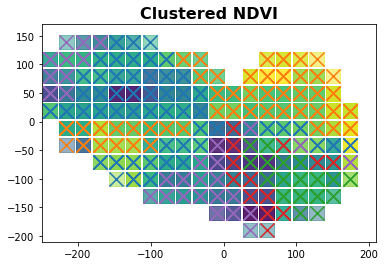

In [12]:
save = 'No'
index = 'NDVI'
colors = ['b','orange','green','r','purple']
os.chdir('/Users/darianng/Documents/MSc_Geography/Spring_Review')
plt.scatter(landsat['lonData'],landsat['latData'],c=landsat[index],marker='s',s=200,alpha=0.5)
plt.xlim([-250,210])
plt.ylim([-210,170])
plt.title(f'{index}',fontweight='bold',fontsize=16)
if save == 'Yes': plt.savefig(f'landsat_cluster_illustration_{index}_pre.png')
for i in range(len(np.unique(cn_PC))):
    clus_num = np.where(cn_PC==i)[0]
    plt.scatter(np.array(matched_ffp['xr'])[clus_num],np.array(matched_ffp['yr'])[clus_num],label=f'cluster {i+1}',marker = 'x',s=200)
plt.xlim([-250,210])
plt.ylim([-210,170])
plt.title(f'Clustered {index}',fontweight='bold',fontsize=16)
if save == 'Yes': plt.savefig(f'landsat_cluster_illustration_{index}_post.png')
os.chdir(rootPath)

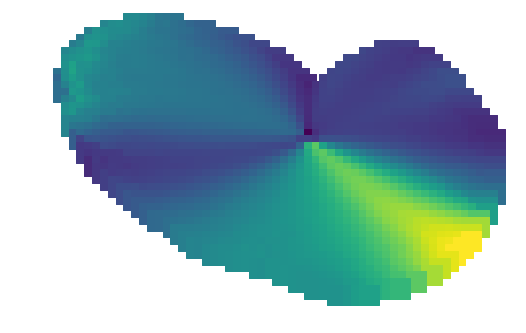

In [137]:
os.chdir('/Users/darianng/Documents/MSc_Geography/Spring_Review')
fig, ax = plt.subplots(1,1,figsize=(8.5,5.5))
ax.scatter(ffp['xr'],ffp['yr'],c=ffp['ch4'],marker = 's',s=420)
ax.axis('off')
fig.savefig('transparent_footprint.png',transparent=True)
os.chdir(rootPath)

In [27]:
collection1 = []
collection2 = []
collection3 = []
for i in range(len(data['id'])):
    this_id = data['id'][i]
    if this_id[:11] == 'LC08_044033':
        collection1.append(i)
    elif this_id[:11] == 'LC08_044034':
        collection2.append(i)
    else:
        collection3.append(i)

In [316]:
os.chdir('/Volumes/GoogleDrive/My Drive/Micromet_GEE')
# data = pd.read_csv('US-Myb_spatial_indices_2014.csv',delimiter = ',',header = 1)
data = pd.read_csv('Young_spatial_indices_2022_May_Mar.csv',delimiter = ',',header = 1)
os.chdir(rootPath)
UniqueID_unsorted = np.unique(data['id'])
UniqueID = np.array([1]*(len(UniqueID_unsorted)))
for i in range(len(UniqueID_unsorted)):
    number = int(UniqueID_unsorted[i][12:])
    UniqueID[i] = (number)
UniqueID.sort()
UniqueID
print(f'\nAvailable landsat scenes: \n{UniqueID}')


Available landsat scenes: 
[20210511 20210527 20210612 20210628 20210808 20210831 20210925 20211002
 20211011 20211018 20211103]


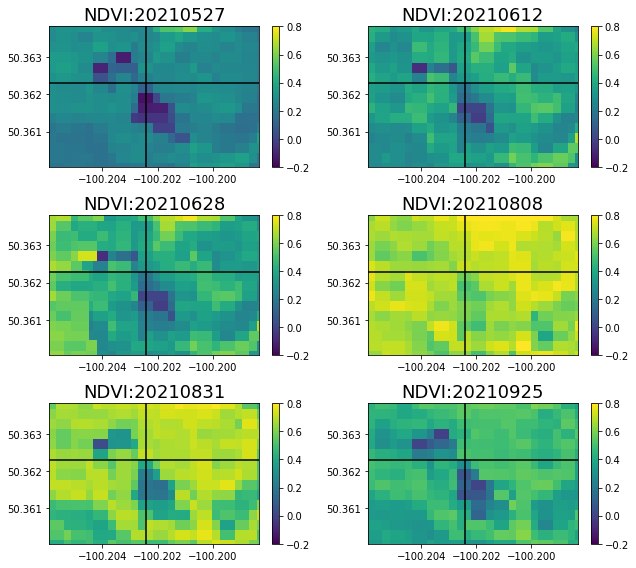

In [342]:
# Plot satellite image
plt.figure(figsize=(9,8))
Value = 'NDVI'
dates = UniqueID[14:29]
dates = UniqueID[1:7]
N = len(data['id'])
Ndate = len(dates)
imageCollection = {'latitude':[],'longitude':[],'NDVI':[],'NDWI':[],'MNDWI_SW1':[],'MNDWI_SW2':[],'CELSIUS':[]}

fixedCBAR = 'y'
cbar_min = -.2
cbar_max = .8
for j, this_date in enumerate(dates):
    for i in range(N):
        id_date = data['id'][i][12:]
        if id_date == str(this_date):
            for key in imageCollection.keys():
                imageCollection[key].append(data[key][i])
    nrow = 3
    plt.subplot(nrow,int(Ndate/nrow),j+1)
    if fixedCBAR=='n':
        plt.scatter(imageCollection['longitude'],imageCollection['latitude'],c=imageCollection[Value],marker='s',s=100)
    else:
        plt.scatter(imageCollection['longitude'],imageCollection['latitude'],c=imageCollection[Value],marker='s',s=100
                   ,vmin=cbar_min,vmax=cbar_max)
    xzoom = -0.0001
    yzoom = -0.00000
    plt.xlim([min(imageCollection['longitude'])-xzoom,max(imageCollection['longitude'])+xzoom])
    plt.ylim([min(imageCollection['latitude'])-yzoom,max(imageCollection['latitude'])+yzoom])
    plt.axvline(tower_coordinates[0],c='k')
    plt.axhline(tower_coordinates[1],c='k')
    plt.title(f'{Value}:{this_date}',fontsize=18)
    plt.ticklabel_format(useOffset=False)
    plt.colorbar()
plt.tight_layout()

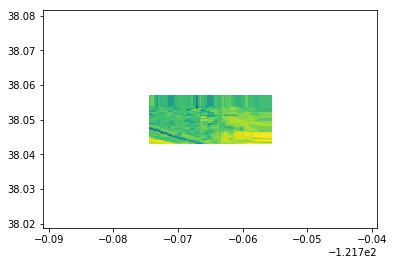

In [86]:
os.chdir('/Volumes/GoogleDrive/My Drive/Micromet_GEE')
data = pd.read_csv('US-Myb_spatial_indices_2014.csv',delimiter = ',',header = 1)
os.chdir(rootPath)
UniqueID

Value = 'NDVI'
dates = UniqueID[14:29]
dates = UniqueID[1:16]
N = len(data['id'])
Ndate = len(dates)
imageCollection = {'latitude':[],'longitude':[],'NDVI':[],'NDWI':[],'MNDWI_SW1':[],'MNDWI_SW2':[],'CELSIUS':[]}

for i in range(N):
    id_date = data['id'][i][12:]
    if id_date == str(20140926):
        for key in imageCollection.keys():
            imageCollection[key].append(data[key][i])
nrow = 3

plt.scatter(imageCollection['longitude'],imageCollection['latitude'],c=imageCollection[Value],marker='s',s=100)


In [107]:
os.chdir('./Saved_Data_Cluster/US-Myb_FFP=202105030-202106020_L8=20210609')
with open('US-Myb_FFP=202105030-202106020_L8=20210609.p', 'rb') as fp:
    load_data = pickle.load(fp)
os.chdir(rootPath)
load_data.keys()

dict_keys(['landsat', 'matched_ffp', 'ffp', 'sector_landsat_average', 'sector_fpp_average', 'lonData', 'latData', 'spatialData'])

# Tovi Analysis

In [93]:
os.chdir('/Volumes/GoogleDrive/.shortcut-targets-by-id/1txCh9lZ7VGCujXGvBaJCMVnuxT-65q4K/Micromet Lab/People/2020-Darian Ng/Tovi_Exports')
# tovi = pd.read_csv('Full Year_derived.csv',header=0,engine ='python')
tovi = pd.read_csv('80Allocation_derived.csv',header=0,engine ='python')
os.chdir(rootPath)
# var1 = "FCH4_cmdsgf_FFA_Vegetation"
# var2 = "FCH4_cmdsgf_FFA_Water"
# var3 = "FCO2_mdsgf_FFA_Vegetation"
# var4 = "FCO2_mdsgf_FFA_Water"

var1 = "FCH4_FFA_Vegetation"
var2 = "FCH4_FFA_Water"
var3 = "FCO2_FFA_Vegetation"
var4 = "FCO2_FFA_Water"
var = [var1,var2,var3,var4]

for ivar in var:
    for i in range(len(tovi['DateTime'])):
        if tovi[ivar][i]=='--':
            tovi[ivar][i] = np.nan
        else:
            tovi[ivar][i] = np.float(tovi[ivar][i])
#         if tovi[var2][i]=='--':
#             tovi[var2][i] = np.nan
#         else:
#             tovi[var2][i] = np.float(tovi[var2][i])

        tovi['time'][i] = tovi['DateTime'][i][:10] 
for ivar in var:
    tovi[ivar] = tovi[ivar].astype('float')
    tovi[ivar] = tovi[ivar].astype('float')

In [94]:
tovi.keys()

Index(['DateTime', 'ET_FFA_Unassigned', 'ET_FFA_Vegetation', 'ET_FFA_Water',
       'FCH4_FFA_Unassigned', 'FCH4_FFA_Vegetation', 'FCH4_FFA_Water',
       'FCO2_FFA_Unassigned', 'FCO2_FFA_Vegetation', 'FCO2_FFA_Water',
       'FH2O_FFA_Unassigned', 'FH2O_FFA_Vegetation', 'FH2O_FFA_Water',
       'FOOTPRINT_CLASS_Vegetation_1', 'FOOTPRINT_CLASS_Water_1',
       'FOOTPRINT_QC', 'H_FFA_Unassigned', 'H_FFA_Vegetation', 'H_FFA_Water',
       'LE_FFA_Unassigned', 'LE_FFA_Vegetation', 'LE_FFA_Water',
       'TAU_FFA_Unassigned', 'TAU_FFA_Vegetation', 'TAU_FFA_Water',
       'USTAR_FFA_Unassigned', 'USTAR_FFA_Vegetation', 'USTAR_FFA_Water',
       'USTAR_QC', 'time'],
      dtype='object')

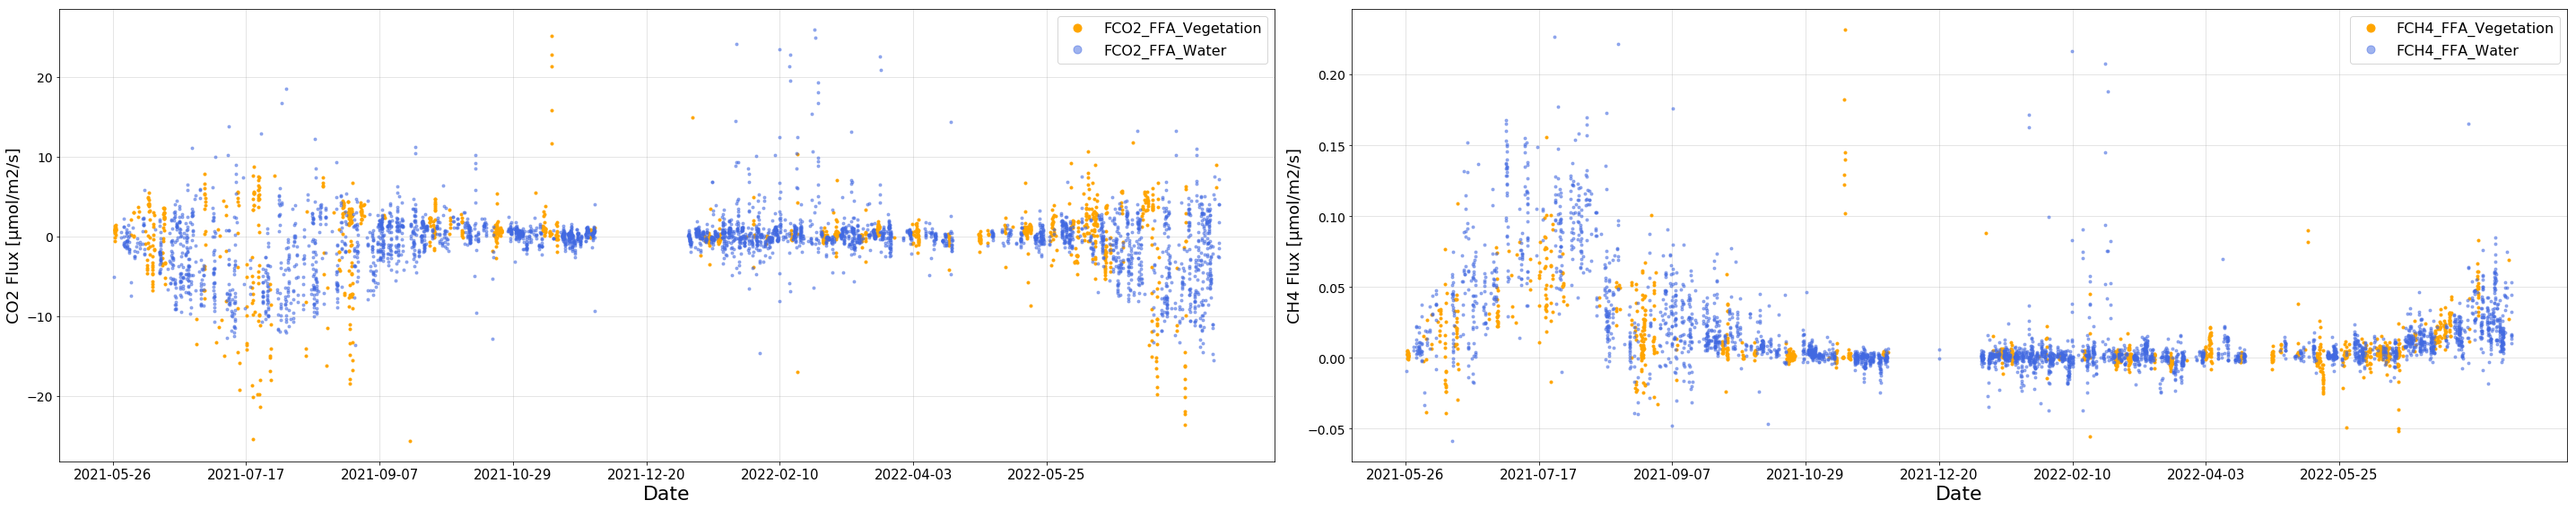

In [95]:
plt.figure(figsize=(40,8))
plt.subplot(1,2,1)
# var1 = "FCO2_mdsgf_FFA_Vegetation"
# var2 = "FCO2_mdsgf_FFA_Water"
# var3 = "FCH4_cmdsgf_FFA_Vegetation"
# var4 = "FCH4_cmdsgf_FFA_Water"
var1 = "FCO2_FFA_Vegetation"
var2 = "FCO2_FFA_Water"
var3 = "FCH4_FFA_Vegetation"
var4 = "FCH4_FFA_Water"
plt.plot(tovi[var1],'.',c='orange',label=var1)
plt.plot(tovi[var2],'.',c='royalblue',label=var2,alpha=0.5)
ticks = np.arange(1,19000,2500)
xlabels = tovi['time'][ticks]
plt.xticks(ticks,xlabels,fontsize = 15)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=22)
plt.ylabel('CO2 Flux [µmol/m2/s]',fontsize=18)
plt.legend(fontsize=16,markerscale=3)
plt.grid(alpha=0.4)
plt.subplot(1,2,2)

plt.plot(tovi[var3],'.',c='orange',label=var3)
plt.plot(tovi[var4],'.',c='royalblue',label=var4,alpha=0.5)
ticks = np.arange(1,19000,2500)
xlabels = tovi['time'][ticks]
plt.xticks(ticks,xlabels,fontsize = 15)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=22)
plt.ylabel('CH4 Flux [µmol/m2/s]',fontsize=18)
plt.legend(fontsize=16,markerscale=3)
plt.grid(alpha=0.4)
win1 = np.where(tovi['time']=='2021-05-30')[0][0]
win2 = np.where(tovi['time']=='2021-09-07')[0][0]
# plt.xlim([win1,win2])
plt.tight_layout()
# plt.savefig('/Users/darianng/Documents/Msc_Geography/Lab/Lab meetings/Tovi tutorial/Allocated_FCH4.png')

In [121]:
tovi['DateTime'][17000]

'2022-05-15 04:00'

In [149]:
# Carbon budget: 
# GHG = [C(seq)] + CH4
# GHG = [NEE(c) - FCH4(c)]x(12.01/44.01) + CH4
# GHG = [NEE x 44.01/12.01 - FCH4 x 16.04/12.01] + CH4 x SGWP(100) **SGWP(20)=96, SGWP(100)=45, SGWP(500)=14
print(var)
# Converting from umol to mol and then from mol/m2/s to mol/m2/yr
ch4_veg = np.nanmean(tovi['FCH4_FFA_Vegetation']/1000000)*31536000
co2_veg = np.nanmean(tovi['FCO2_FFA_Vegetation']/1000000)*31536000
ch4_water = np.nanmean(tovi['FCH4_FFA_Water']/1000000)*31536000
co2_water = np.nanmean(tovi['FCO2_FFA_Water']/1000000)*31536000
SGWP = 45

# GHG_veg = (co2_veg *(12.01) - ch4_veg*(12.01))*(44.01/12.01) + ch4_veg*(16.04)*SGWP
# GHG_water = (co2_water *(12.01) - ch4_water*(12.01))*(44.01/12.01) + ch4_water*(16.04)*SGWP
# plt.figure(figsize=(20,7))
# plt.plot(GHG_veg,'.',label='Vegetation',markersize=2)
# plt.plot(GHG_water,'.',label='Water',markersize=2)
# plt.xticks(ticks,xlabels,fontsize = 12)
# plt.grid(alpha=0.3)
# plt.title('GHG Balance at Young',fontsize=22)
# plt.legend()

['FCH4_FFA_Vegetation', 'FCH4_FFA_Water', 'FCO2_FFA_Vegetation', 'FCO2_FFA_Water']


In [150]:
co2_veg_cum = np.sum(co2_veg)
co2_water_cum = np.sum(co2_water)
ch4_veg_cum = np.sum(ch4_veg)
ch4_water_cum = np.sum(ch4_water)
GHG_veg = (co2_veg_cum*(12.01) - ch4_veg_cum*(12.01))*(44.01/12.01) + ch4_veg_cum*16.04*SGWP
GHG_water = (co2_water_cum *(12.01) - ch4_water_cum*(12.01))*(44.01/12.01) + ch4_water_cum*16.04*SGWP
print(f'Veg GHG Balance: {np.round(GHG_veg,3)} gCO2eq/m2/yr \nWater GHG Balance: {np.round(GHG_water,3)} gCO2eq/m2/yr')
ch4_veg,ch4_water,co2_veg,co2_water

Veg GHG Balance: -86.295 gCO2eq/m2/yr 
Water GHG Balance: -595.624 gCO2eq/m2/yr


(0.3562403768939491, 0.5467253774890316, -7.44720113541466, -21.95384184744449)

In [109]:
# print(f'Growing season ({tovi["time"][win1]} to {tovi["time"][win2]}))\n-----------------------\n\033[4mMax\033[0m')
# print("Vegetation",np.round(np.nanmax(tovi[var1][win1:win2]),4),"µmol/m2/s")
# print("Open Water",np.round(np.nanmax(tovi[var2][win1:win2]),4))
# print('\n\033[4mMean\033[0m')
# print("Vegetation",np.round(np.nanmean(tovi[var1][win1:win2]),4),"µmol/m2/s")
# print("Open Water",np.round(np.nanmean(tovi[var2][win1:win2]),4))
# print('\n\033[4mMedian\033[0m')
# print("Vegetation",np.round(np.nanmedian(tovi[var1][win1:win2]),4),"µmol/m2/s")
# print("Open Water",np.round(np.nanmedian(tovi[var2][win1:win2]),4))
# print(f'           * * *\nNon-growing season ({tovi["time"][win2]} to {tovi["time"].iloc[-1]})\n-----------------------\n\033[4mMax\033[0m')
# print("Vegetation",np.round(np.nanmax(tovi[var1][win2:]),4),"µmol/m2/s")
# print("Open Water",np.round(np.nanmax(tovi[var2][win2:]),4))
# print('\n\033[4mMean\033[0m')
# print("Vegetation",np.round(np.nanmean(tovi[var1][win2:]),4),"µmol/m2/s")
# print("Open Water",np.round(np.nanmean(tovi[var2][win2:]),4))
# print('\n\033[4mMedian\033[0m')
# print("Vegetation",np.round(np.nanmedian(tovi[var1][win2:]),4),"µmol/m2/s")
# print("Open Water",np.round(np.nanmedian(tovi[var2][win2:]),4))

/Users/darianng/miniconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


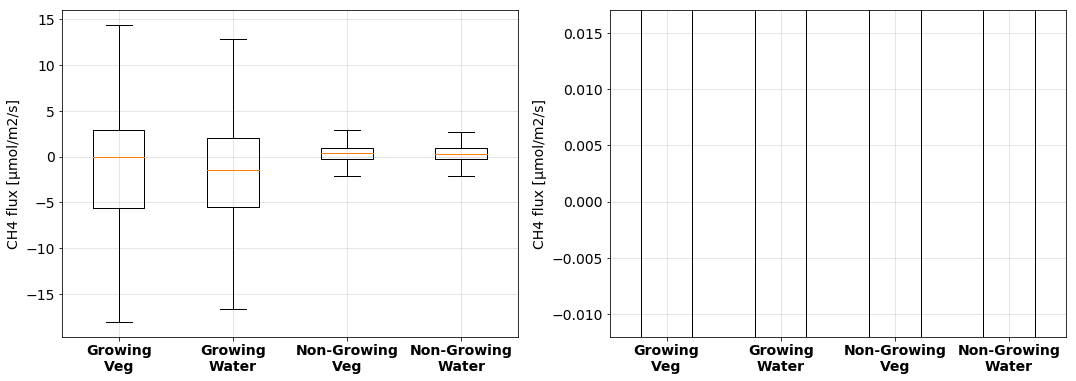

In [7]:
boxdata = tovi[var1][win1:win2]
boxdata = np.array(boxdata[~np.isnan(boxdata)])
boxdata2 = tovi[var2][win1:win2]
boxdata2 = np.array(boxdata2[~np.isnan(boxdata2)])

boxdata3 = tovi[var1][win2:]
boxdata3 = np.array(boxdata3[~np.isnan(boxdata3)])
boxdata4 = tovi[var2][win2:]
boxdata4 = np.array(boxdata4[~np.isnan(boxdata4)])
boxdata_final = [boxdata,boxdata2,boxdata3,boxdata4]
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.boxplot(boxdata_final,showfliers=False)
plt.xticks([1, 2, 3,4], ['Growing\nVeg', 'Growing\nWater', 'Non-Growing\nVeg','Non-Growing\nWater'],fontsize=14,fontweight='bold')
plt.yticks(fontsize=14)
plt.ylabel('CH4 flux [µmol/m2/s]',fontsize=14)
plt.grid(alpha=0.4)
plt.subplot(1,2,2)
plt.boxplot(boxdata_final,showfliers=False)
plt.xticks([1, 2, 3,4], ['Growing\nVeg', 'Growing\nWater', 'Non-Growing\nVeg','Non-Growing\nWater'],fontsize=14,fontweight='bold')
plt.yticks(fontsize=14)
plt.ylabel('CH4 flux [µmol/m2/s]',fontsize=14)
plt.ylim([-0.012,0.017]) # Zoom on non-growing
plt.grid(alpha=0.4)

In [83]:
from scipy import stats
stats.ttest_ind(boxdata, boxdata2)
stat,pval = stats.ttest_ind(boxdata2, boxdata, equal_var=False)
tcrit = stats.t.ppf(q=0.975, df=len(boxdata)-1)
print(f't-stat = {np.round(stat,3)} \nt-crit =  {np.round(tcrit,3)} \np-value = {pval}')

t-stat = 10.012 
t-crit =  1.961 
p-value = 2.1464969652147546e-23


In [22]:
stats.ttest_ind(boxdata3, boxdata4, equal_var=False)

Ttest_indResult(statistic=-1.2239444323119815, pvalue=0.22100232177675372)

In [5]:
# Tovi Analyses
os.chdir('/Volumes/GoogleDrive/.shortcut-targets-by-id/1txCh9lZ7VGCujXGvBaJCMVnuxT-65q4K/Micromet Lab/People/2020-Darian Ng/Tovi_Exports')
tovi2 = pd.read_csv('./70%_footprint_allocation/Even20_derived.csv',header=0)
os.chdir(rootPath)
# Excluding first row of data (which are units)
tovi2.drop(index=tovi2.index[0], axis=0, inplace=True)
tovi2 = tovi2.reset_index()

NameError: name 'rootPath' is not defined

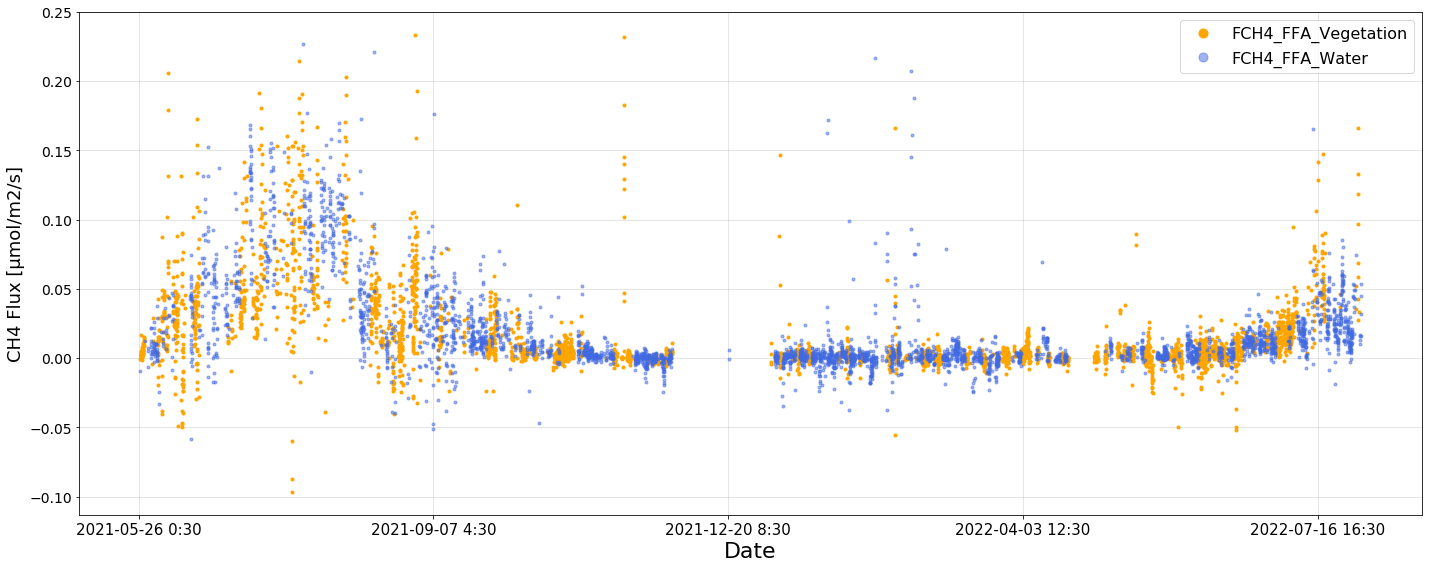

In [6]:
var1 = "FCH4_FFA_Vegetation"
var2 = "FCH4_FFA_Water"

# for i in range(len(tovi['DateTime'])):
#     if tovi2[var1][i]=='--':
#         tovi2[var1][i] = np.nan
#     else:
#         tovi2[var1][i] = np.float(tovi2[var1][i])
#     if tovi2[var2][i]=='--':
#         tovi2[var2][i] = np.nan
#     else:
#         tovi2[var2][i] = np.float(tovi2[var2][i])
        
#     tovi2['time'][i] = tovi2['DateTime'][i][:10] 
#     if i%1000 == 0:
#         print(f'{i}/{len(tovi2[var1])}')
# tovi2[var1] = tovi2[var1].astype('float')
# tovi2[var2] = tovi2[var2].astype('float')
plt.figure(figsize=(20,8))

plt.plot(tovi2[var1],'.',c='orange',label=var1)
plt.plot(tovi2[var2],'.',c='royalblue',label=var2,alpha=0.5)
ticks = np.arange(1,25000,5000)
xlabels = tovi2['DateTime'][ticks]
plt.xticks(ticks,xlabels,fontsize = 15)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=22)
plt.ylabel('CH4 Flux [µmol/m2/s]',fontsize=18)
plt.legend(fontsize=16,markerscale=3)
plt.grid(alpha=0.4)
win3 = 19000
win4 = len(tovi2[var1])
# plt.xlim([win3,win4])
fall_2021 = np.where(tovi2['DateTime']=='2021-09-01 0:00')[0][0]
spring_2022 = np.where(tovi2['DateTime']=='2022-07-01 0:00')[0][0]
# plt.axvline(1000)
# plt.axvline(fall_2021,c='orange')
# plt.axvline(spring_2022,c='green')

plt.tight_layout()
# plt.savefig('/Users/darianng/Documents/Msc_Geography/Lab/Lab meetings/Tovi tutorial/Allocated_FCH4.png')

In [150]:
len(growing_veg),len(growing_water)

(1103, 1084)

/Users/darianng/miniconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


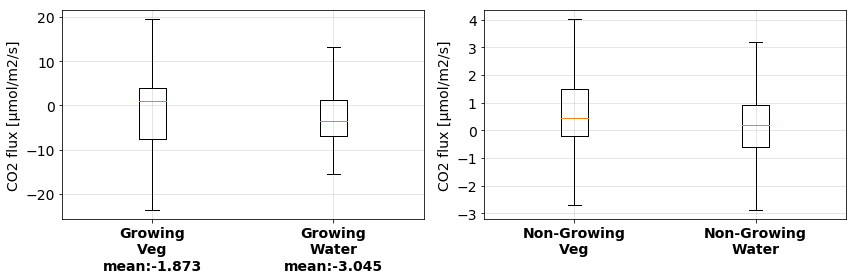

In [164]:
var1 = "FCO2_FFA_Vegetation"
var2 = "FCO2_FFA_Water"
fall_2021 = np.where(tovi2['DateTime']=='2021-09-01 0:00')[0][0]
spring_2022 = np.where(tovi2['DateTime']=='2022-07-01 0:00')[0][0]
growing_window = np.concatenate((np.arange(1000,fall_2021),np.arange(spring_2022,len(tovi2['DateTime']))))

growing_veg = tovi2[var1][growing_window]
growing_veg = np.array(growing_veg[~np.isnan(growing_veg)])
growing_water = tovi2[var2][growing_window]
growing_water = np.array(growing_water[~np.isnan(growing_water)])

nongrowing_veg = tovi2[var1][fall_2021:spring_2022]
nongrowing_veg = np.array(nongrowing_veg[~np.isnan(nongrowing_veg)])
nongrowing_water = tovi2[var2][fall_2021:spring_2022]
nongrowing_water = np.array(nongrowing_water[~np.isnan(nongrowing_water)])

boxdata_final = [growing_veg,growing_water]
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.boxplot(boxdata_final,showfliers=False)
plt.xticks([1, 2], [f'Growing\nVeg\nmean:{np.round(np.nanmean(growing_veg),3)}', f'Growing\nWater\nmean:{np.round(np.nanmean(growing_water),3)}'],fontsize=14,fontweight='bold')
# plt.xticks([1, 2,3,4], ['2021 Growing\nVeg', '2021 Growing\nWater','2022 Growing\nVeg', '2022 Growing\nWater'],fontsize=14,fontweight='bold')
plt.yticks(fontsize=14)
plt.ylabel('CO2 flux [µmol/m2/s]',fontsize=14)
plt.grid(alpha=0.4)
boxdata_final = [nongrowing_veg,nongrowing_water]
plt.subplot(1,2,2)
plt.boxplot(boxdata_final,showfliers=False)
plt.xticks([1, 2], ['Non-Growing\nVeg', 'Non-Growing\nWater'],fontsize=14,fontweight='bold')
# plt.xticks([1, 2,3,4], ['2021 Growing\nVeg', '2021 Growing\nWater','2022 Growing\nVeg', '2022 Growing\nWater'],fontsize=14,fontweight='bold')
plt.yticks(fontsize=14)
plt.ylabel('CO2 flux [µmol/m2/s]',fontsize=14)
plt.grid(alpha=0.4)
plt.tight_layout()

In [102]:
from scipy import stats
stats.ttest_ind(growing_veg, growing_water)
stat,pval = stats.ttest_ind(growing_veg, growing_water, equal_var=False)
tcrit = stats.t.ppf(q=0.975, df=len(growing_veg)-1)
print(f'Growing Season:\nt-stat = {np.round(stat,3)} \nt-crit =  {np.round(tcrit,3)} \np-value = {pval}')
stats.ttest_ind(nongrowing_veg, nongrowing_water)
stat,pval = stats.ttest_ind(nongrowing_veg, nongrowing_water, equal_var=False)
tcrit = stats.t.ppf(q=0.975, df=len(nongrowing_veg)-1)
print(f'\nNon-Growing Season:\nt-stat = {np.round(stat,3)} \nt-crit =  {np.round(tcrit,3)} \np-value = {pval}')

Growing Season:
t-stat = 3.942 
t-crit =  1.963 
p-value = 8.579016044615115e-05

Non-Growing Season:
t-stat = 2.502 
t-crit =  1.963 
p-value = 0.012472686961971189


# -Analysis- Segregating Water and Vegetation
#####    - Reversing clustering: Cluster Landsat --> apply to FFP

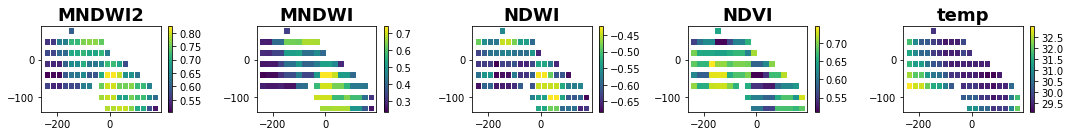

In [41]:
# Plotting L8 maps:
# - Landsat keys: 'MNDWI2', 'MNDWI', 'NDVI', 'NDWI', 'temp', 'lonData', 'latData'
plt.figure(figsize=(15,2))
indices = ['MNDWI2', 'MNDWI', 'NDWI', 'NDVI', 'temp']
for i,index in enumerate(indices):
    plt.subplot(1,5,i+1)
    ax = plt.scatter(landsat['lonData'],landsat['latData'],c=landsat[index],marker='s',s=20)
    plt.title(index,fontweight='bold',fontsize=18)
    plt.colorbar(ax)
plt.tight_layout()

/Users/darianng/miniconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


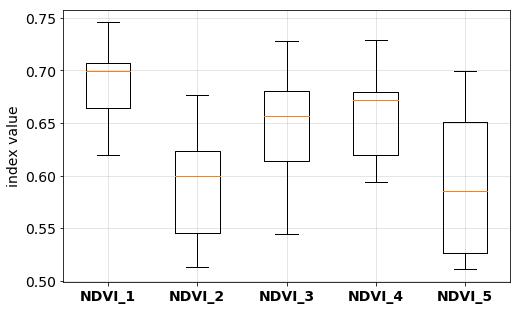

In [44]:
# boxdata = landsat['MNDWI2']
# boxdata2 = landsat['MNDWI']
# boxdata3 = np.abs(landsat['NDWI'])
# boxdata4 = landsat['NDVI']
# boxdata5 = landsat['temp']

# Populating boxdata dataset
boxdata_final = []
index_names = []
for i in range(5):
    var = "NDVI_"+str(i+1)
    this_data = clustered_landsat[var]
    boxdata_final.append(this_data)
    index_names.append(var)
plt.figure(figsize=(8,5))

plt.boxplot(boxdata_final,showfliers=False)
plt.xticks([1,2,3,4,5],index_names,fontsize=14,fontweight='bold')
# plt.xticks([1, 2,3,4], ['2021 Growing\nVeg', '2021 Growing\nWater','2022 Growing\nVeg', '2022 Growing\nWater'],fontsize=14,fontweight='bold')
plt.yticks(fontsize=14)
plt.ylabel('index value',fontsize=14)
plt.grid(alpha=0.4)

#### Clustering on L8:

/Users/darianng/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


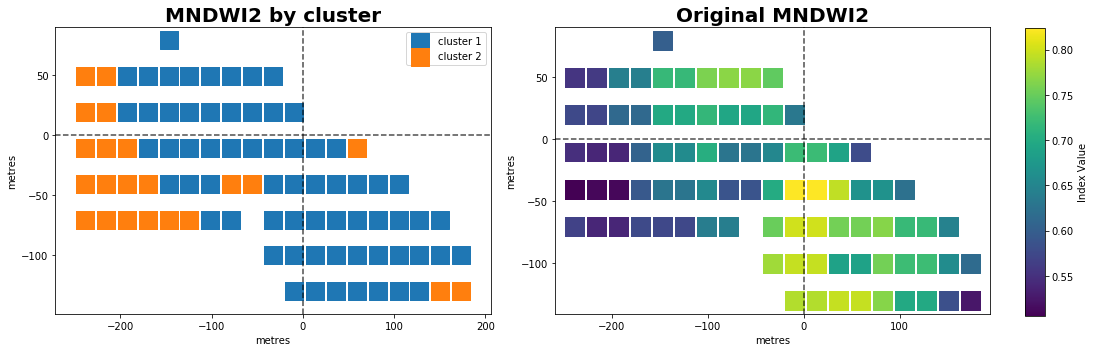

In [73]:
n_clusters = 2
L8_var = 'MNDWI2'
dend_data = np.transpose([landsat[L8_var],landsat[L8_var]])

cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

cn_PC_reverse = cluster.fit_predict(dend_data)
cluster_pattern_PC_reverse = np.empty((n_clusters,np.shape(dend_data)[1]))

# For 2 clusters
for cluster_num in range(n_clusters):
    inds_PC = np.argwhere(cn_PC_reverse==cluster_num)
    cluster_pattern_PC_reverse[cluster_num,:] = np.mean(dend_data[inds_PC,:],axis=0)
    
fig2, ax2 = plt.subplots(1,2,figsize=(14,5))
for i in range(len(np.unique(cn_PC_reverse))):
    clus_num = np.where(cn_PC_reverse==i)[0]
    ax2[0].scatter(np.array(lonData)[clus_num],np.array(latData)[clus_num],label=f'cluster {i+1}',marker = 's',s=350)


raw = ax2[1].scatter(lonData,latData,c=landsat[L8_var],marker = 's',s=350)
    
ax2[0].set_ylabel('metres'),ax2[1].set_ylabel('metres')
ax2[0].set_xlabel('metres'),ax2[1].set_xlabel('metres')
ax2[0].set_title(f'{L8_var} by cluster',fontsize = 20, fontweight='bold'),ax2[1].set_title(f'Original {L8_var}',fontsize = 20,fontweight='bold')
ax2[0].legend()
ax2[0].axvline(0,c='k',linestyle='--',alpha=0.7),ax2[0].axhline(0,c='k',linestyle='--',alpha=0.7)
ax2[1].axvline(0,c='k',linestyle='--',alpha=0.7),ax2[1].axhline(0,c='k',linestyle='--',alpha=0.7)

cbar_ax = fig2.add_axes([1.02, 0.11, 0.02, 0.8])
cbar1 = fig2.colorbar(raw, ax=ax2[1],cax=cbar_ax,label = 'Index Value')
plt.tight_layout()

### Applying clustering to ffp data

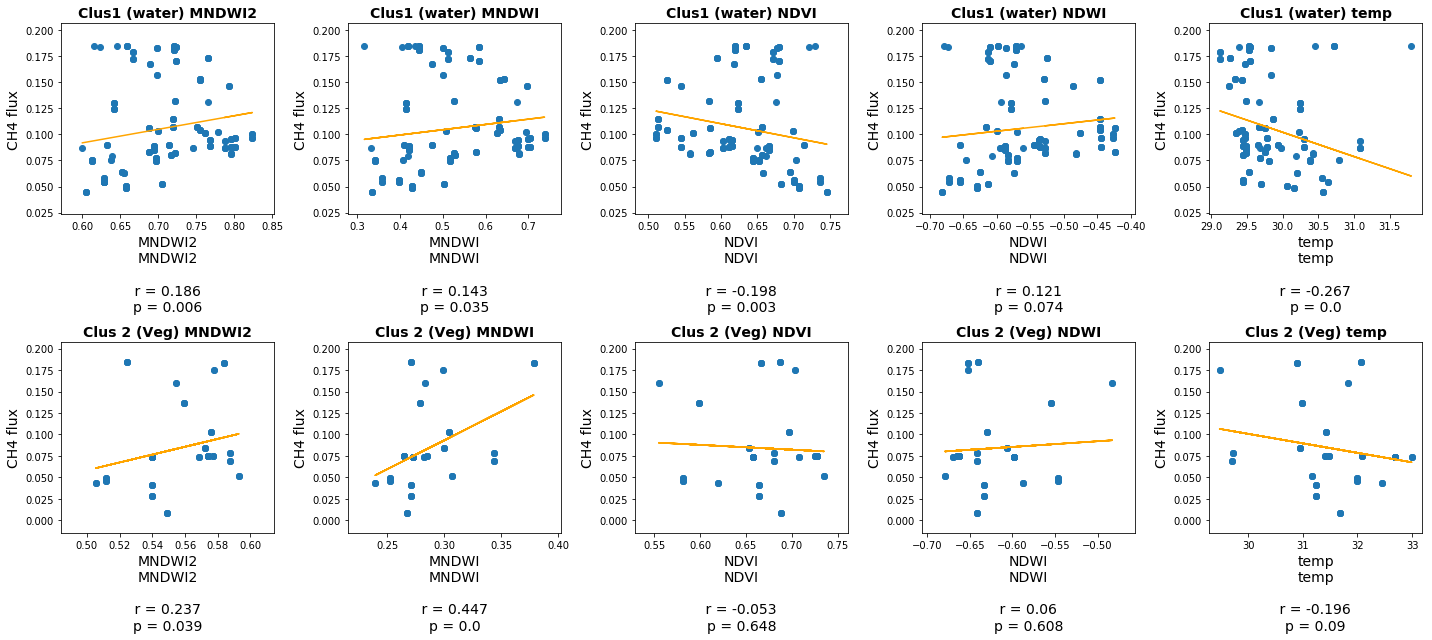

In [95]:
# Compiling data - Current state is Clus 1 = Water. This ought to be subject to change.
clustered_ffp_reverse = {}
clustered_landsat_reverse = {}
for clus_idx in range(n_clusters):
    clus_num = np.where(cn_PC_reverse == clus_idx)[0]
    clustered_ffp_reverse[f'xr_{clus_idx+1}'] = np.array(matched_ffp['xr'])[clus_num]
    clustered_ffp_reverse[f'yr_{clus_idx+1}'] = np.array(matched_ffp['yr'])[clus_num]
    clustered_ffp_reverse[f'ch4_{clus_idx+1}'] = np.array(matched_ffp['ch4'])[clus_num]
    clustered_landsat_reverse[f'NDVI_{clus_idx+1}'] = np.array(landsat['NDVI'])[clus_num]
    clustered_landsat_reverse[f'NDWI_{clus_idx+1}'] = np.array(landsat['NDWI'])[clus_num]
    clustered_landsat_reverse[f'MNDWI_{clus_idx+1}'] = np.array(landsat['MNDWI'])[clus_num]
    clustered_landsat_reverse[f'MNDWI2_{clus_idx+1}'] = np.array(landsat['MNDWI2'])[clus_num]
    clustered_landsat_reverse[f'temp_{clus_idx+1}'] = np.array(landsat['temp'])[clus_num]
# mean_clustered_ffp = []
# mean_clustered_landsat = {'NDVI':[],'NDWI':[],'MNDWI':[],'MNDWI2':[],'temp':[]}
# for i in range(n_clusters):
#     mean_clustered_ffp.append(np.mean(clustered_ffp[f'ch4_{i+1}']))
#     for idx,key in enumerate(spatialData):
#         mean_clustered_landsat[key].append(np.mean(clustered_landsat[f'{key}_{i+1}']))   

# Water (Clus 1)
plt.figure(figsize = (20,9))
for idx,key in enumerate(spatialData):
    plt.subplot(2,5,idx+1)
    x_data = clustered_landsat_reverse[f'{key}_1']
    y_data = clustered_ffp_reverse[f'ch4_1']
    plt.scatter(x_data,y_data)
    plt.title(f'Clus1 (water) {key}',fontweight='bold',fontsize=14)
    m, b = np.polyfit(x_data,y_data,1)
    yfit = m*np.array(x_data)+b
    plt.plot(x_data,yfit,'orange')
    r_val, p_val = stats.pearsonr(x_data,y_data)
    corr = f'{key}\n \n r = {np.round(r_val,3)} \np = {np.round(p_val,3)}'
    plt.ylabel('CH4 flux',fontsize=14)
    plt.xlabel(f'{key}\n{corr}',fontsize=14)
    
    plt.subplot(2,5,idx+6)
    x_data = clustered_landsat_reverse[f'{key}_2']
    y_data = clustered_ffp_reverse[f'ch4_2']
    plt.scatter(x_data,y_data)
    plt.title(f'Clus 2 (Veg) {key}',fontweight='bold',fontsize=14)
    m, b = np.polyfit(x_data,y_data,1)
    yfit = m*np.array(x_data)+b
    plt.plot(x_data,yfit,'orange')
    r_val, p_val = stats.pearsonr(x_data,y_data)
    corr = f'{key}\n \n r = {np.round(r_val,3)} \np = {np.round(p_val,3)}'
    plt.ylabel('CH4 flux',fontsize=14)
    plt.xlabel(f'{key}\n{corr}',fontsize=14)
plt.tight_layout()

In [313]:
# REMOVING DUPLICATES.
dup_test = np.add(matched_ffp['xr'],matched_ffp['yr']) #Finds duplicates of xr,yr combination - e.g. sum(lat,lon)
confirm_wrong_length = len(dup_test)
confirm_right_length = len(np.unique(dup_test))
confirmation = confirm_wrong_length == confirm_right_length
print(f"length check: {confirmation}\n - dataset length is: {confirm_wrong_length}\n - length should be: {confirm_right_length}")

test = np.copy(np.array(matched_ffp['ch4']))
dup_list = []
if confirmation == False:
    u, c = np.unique(dup_test, return_counts=True) # u = unique sum(lat,lon) array; c = how many dups in each
    dup = u[c > 1] # sum(lat,lon) values of duplicates
    dup_idx = np.where(c > 1)[0] # index of duplicate values
    for ii,dup_val in enumerate(dup):
        same_idx = np.where(dup_test == dup_val)[0] # index in original dataset of duplicates
        for idx in same_idx[1:]:
            dup_list.append(idx)
        
test = np.delete(test,dup_list)
if len(test)==confirm_right_length:
    print(f'\ndata length is fixed! length: {len(test)}')
else:
    print(f'\nwrong length still. length is: {len(test)}, should be: {confirm_right_length}')

length check: False
 - dataset length is: 295
 - length should be: 88


In [ ]:
# Compiling data - Current state is Clus 1 = Water. This ought to be subject to change.
clustered_ffp_reverse = {}
clustered_landsat_reverse = {}
for clus_idx in range(n_clusters):
    clus_num = np.where(cn_PC_reverse == clus_idx)[0]
    clustered_ffp_reverse[f'xr_{clus_idx+1}'] = np.array(matched_ffp['xr'])[clus_num]
    clustered_ffp_reverse[f'yr_{clus_idx+1}'] = np.array(matched_ffp['yr'])[clus_num]
    clustered_ffp_reverse[f'ch4_{clus_idx+1}'] = np.array(matched_ffp['ch4'])[clus_num]
    clustered_landsat_reverse[f'NDVI_{clus_idx+1}'] = np.array(landsat['NDVI'])[clus_num]
    clustered_landsat_reverse[f'NDWI_{clus_idx+1}'] = np.array(landsat['NDWI'])[clus_num]
    clustered_landsat_reverse[f'MNDWI_{clus_idx+1}'] = np.array(landsat['MNDWI'])[clus_num]
    clustered_landsat_reverse[f'MNDWI2_{clus_idx+1}'] = np.array(landsat['MNDWI2'])[clus_num]
    clustered_landsat_reverse[f'temp_{clus_idx+1}'] = np.array(landsat['temp'])[clus_num]
# mean_clustered_ffp = []
# mean_clustered_landsat = {'NDVI':[],'NDWI':[],'MNDWI':[],'MNDWI2':[],'temp':[]}
# for i in range(n_clusters):
#     mean_clustered_ffp.append(np.mean(clustered_ffp[f'ch4_{i+1}']))
#     for idx,key in enumerate(spatialData):
#         mean_clustered_landsat[key].append(np.mean(clustered_landsat[f'{key}_{i+1}']))   

# Water (Clus 1)
plt.figure(figsize = (20,9))
for idx,key in enumerate(spatialData):
    plt.subplot(2,5,idx+1)
    x_data = clustered_landsat_reverse[f'{key}_1']
    y_data = clustered_ffp_reverse[f'ch4_1']
    plt.scatter(x_data,y_data)
    plt.title(f'Clus1 (water) {key}',fontweight='bold',fontsize=14)
    m, b = np.polyfit(x_data,y_data,1)
    yfit = m*np.array(x_data)+b
    plt.plot(x_data,yfit,'orange')
    r_val, p_val = stats.pearsonr(x_data,y_data)
    corr = f'{key}\n \n r = {np.round(r_val,3)} \np = {np.round(p_val,3)}'
    plt.ylabel('CH4 flux',fontsize=14)
    plt.xlabel(f'{key}\n{corr}',fontsize=14)
    
    plt.subplot(2,5,idx+6)
    x_data = clustered_landsat_reverse[f'{key}_2']
    y_data = clustered_ffp_reverse[f'ch4_2']
    plt.scatter(x_data,y_data)
    plt.title(f'Clus 2 (Veg) {key}',fontweight='bold',fontsize=14)
    m, b = np.polyfit(x_data,y_data,1)
    yfit = m*np.array(x_data)+b
    plt.plot(x_data,yfit,'orange')
    r_val, p_val = stats.pearsonr(x_data,y_data)
    corr = f'{key}\n \n r = {np.round(r_val,3)} \np = {np.round(p_val,3)}'
    plt.ylabel('CH4 flux',fontsize=14)
    plt.xlabel(f'{key}\n{corr}',fontsize=14)
plt.tight_layout()